## Regresión Logística


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

%run "../util/funciones.ipynb"

Carga de datos

In [2]:
#Carga de datos
df=pd.read_csv('../data/processed/cancer_limpio.csv')
df.head(10)

,perimeter_worst,area_worst,radius_worst,perimeter_mean,radius_mean,area_se,area_mean,perimeter_se,texture_worst,texture_mean,radius_se,concavity_worst,compactness_worst,concave points_worst,diagnosis
0,99.70,711.2,15.110,87.46,13.540,23.560,566.3,2.058,19.26,14.36,0.2699,0.23900,0.17730,0.12880,0
1,96.09,630.5,14.500,85.63,13.080,14.670,520.0,1.383,20.49,15.71,0.1852,0.18900,0.27760,0.07283,0
2,65.13,314.9,10.230,60.34,9.504,15.700,273.9,1.909,15.66,12.44,0.2773,0.08867,0.11480,0.06227,0
3,84.46,545.9,13.300,82.61,13.030,14.160,523.8,1.170,22.81,18.42,0.1839,0.04833,0.04619,0.05013,0
4,57.26,242.2,8.964,51.71,8.196,8.205,201.9,1.094,21.96,16.84,0.1563,0.06880,0.13570,0.02564,0
5,89.88,582.6,13.760,78.04,12.050,19.870,449.3,1.848,20.70,14.63,0.2636,0.30500,0.21560,0.06548,0
6,99.00,698.8,15.150,86.91,13.490,20.200,561.0,1.735,31.82,22.30,0.2338,0.22820,0.17110,0.12820,0
7,82.98,516.5,12.980,74.72,11.760,28.470,427.9,2.635,25.72,21.60,0.4062,0.05523,0.08615,0.03715,0
8,96.08,656.7,14.670,87.21,13.640,14.550,571.8,1.449,23.19,16.34,0.1872,0.10500,0.15820,0.08586,0
9,83.67,527.2,13.100,75.71,11.940,17.470,437.6,1.520,21.33,18.24,0.2273,0.09203,0.08906,0.06296,0


Train & Test

In [3]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

LogisticRegression

In [5]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [6]:
predicciones_log_reg = log_reg.predict(x_test_scaled)
print(classification_report(y_test, predicciones_log_reg))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       279
           1       0.97      0.90      0.93       148

    accuracy                           0.96       427
   macro avg       0.96      0.94      0.95       427
weighted avg       0.96      0.96      0.96       427



In [7]:
log_reg.score(x_test_scaled, y_test)

0.955503512880562

In [8]:
log_reg.coef_

array([[ 3.85247796,  3.52400141,  0.85435531, -0.87969506, -1.16075623,
         1.84381123, -1.05817519, -0.21542206,  1.10441009, -0.87592452,
        -0.08944149,  0.11004864,  0.24336543, -0.09665824]])

In [9]:
#Resultados de la validacion cruzada
score = ['f1','precision','accuracy','recall']
print('Resultados validacion cruzada:')
for sc in score:
    rendimiento_log_reg = cross_val_score(log_reg, x_train_scaled, y_train, cv=5, scoring=sc)
    rendimiento_medio_log_reg = rendimiento_log_reg.mean()

    print('rendimiento medio',sc,':',rendimiento_medio_log_reg)

Resultados validacion cruzada:
rendimiento medio f1 : 0.9372767569207733
rendimiento medio precision : 0.9737584970955384
rendimiento medio accuracy : 0.95390625
rendimiento medio recall : 0.9037450031559017


[[275   4]
 [ 15 133]]


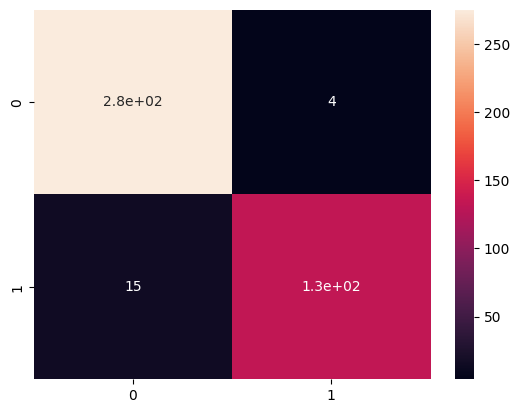

In [10]:
c_matrix_log_reg = confusion_matrix(y_test, predicciones_log_reg)
sns.heatmap(c_matrix_log_reg, annot=True)
print(c_matrix_log_reg)

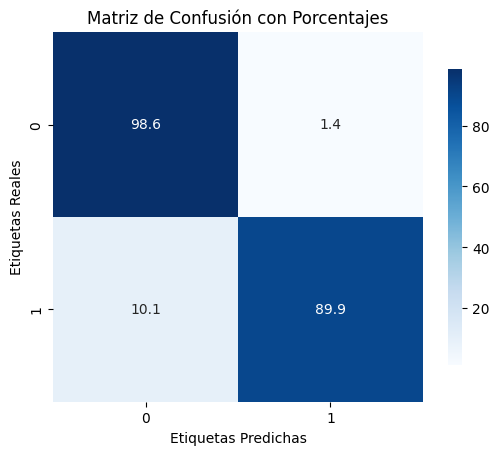

In [11]:
matriz_porcentajes(c_matrix_log_reg)

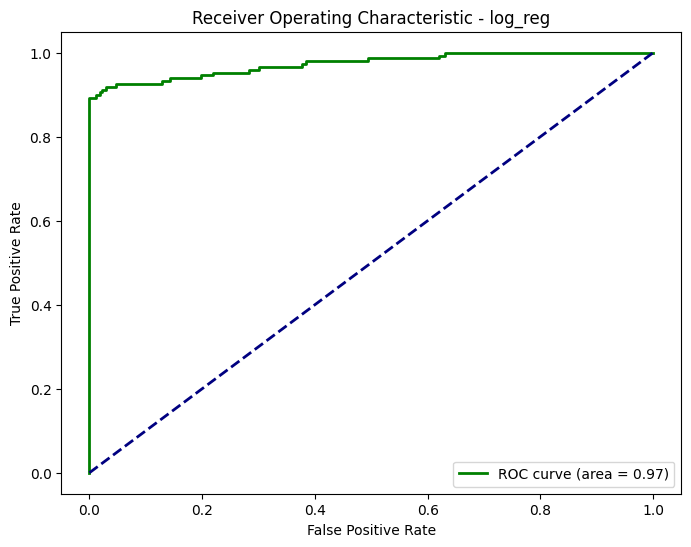

In [12]:
curva_ROC('log_reg',log_reg,x_test_scaled,y_test)

Regresión logística con Grid y Validación cruzada

In [13]:
param_grid = {'max_iter':[1000,2000,3000]}

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)
mejores_parametros_log_reg = grid_search.best_params_
mejor_modelo_log_reg_grid = grid_search.best_estimator_
print('Resultado validacion cruzada:')
for sc in score:
    rendimiento_log_reg_grid = cross_val_score(mejor_modelo_log_reg_grid, x_train_scaled, y_train, cv=5, scoring= sc)
    rendimiento_medio_log_reg = rendimiento_log_reg_grid.mean()

    print('rendimiento medio',sc,':',rendimiento_medio_log_reg)
print('mejores parametros:',mejores_parametros_log_reg)

Resultado validacion cruzada:
rendimiento medio f1 : 0.9372767569207733
rendimiento medio precision : 0.9737584970955384
rendimiento medio accuracy : 0.95390625
rendimiento medio recall : 0.9037450031559017
mejores parametros: {'max_iter': 1000}


Guardamos modelo

In [14]:
import pickle

with open('../model/modelo_logistico.pkl', 'wb') as archivo:
    pickle.dump(log_reg, archivo)


In [15]:
with open('../model/modelo_logisticoGrid.pkl', 'wb') as archivo:
    pickle.dump(mejor_modelo_log_reg, archivo)
